# 作業
請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram
[作業目標]
試著調整資料, 並利用提供的程式繪製分布圖
[作業重點]
如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [125]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

dir_data = 'desktop/data/'


In [126]:
#讀取檔案
f_app = os.path.join(dir_data,'application_train.csv')
print('path of read in data ia :%s'%(f_app))

path of read in data ia :desktop/data/application_train.csv


In [127]:
app_train = pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64
True     154297
False    153214
Name: HOUSETYPE_MODE, dtype: int64
4
2


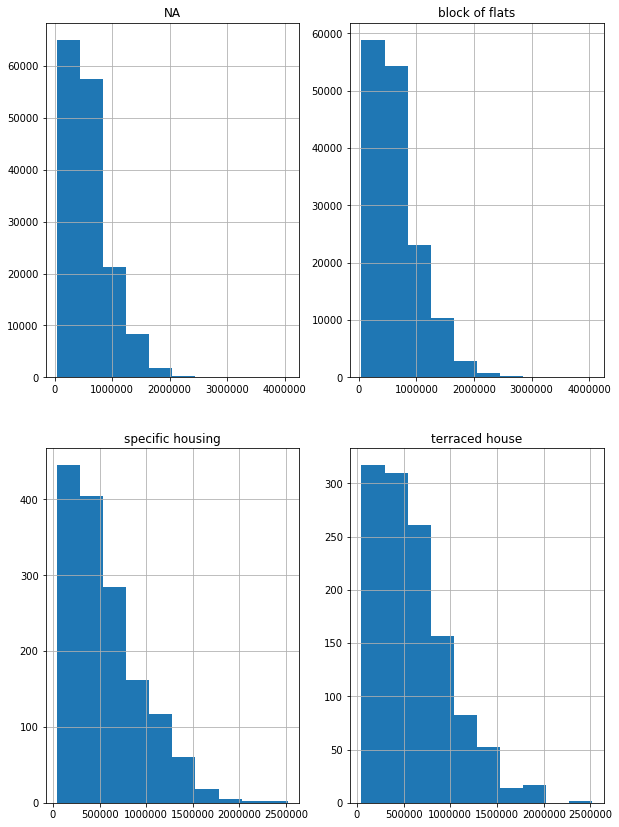

In [128]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
#先了解特徵有幾種類別數據
HT = app_train['HOUSETYPE_MODE'].value_counts()
print(HT)
#了解特徵有多少空值
HT1 = app_train['HOUSETYPE_MODE'].isnull().value_counts()
print(HT1)
#將空值填入NA

app_train['HOUSETYPE_MODE'].fillna('NA',inplace=True)
unique_house_type =np.sort(app_train['HOUSETYPE_MODE'].unique())


#print(unique_house_type)

nrows = len(unique_house_type)
ncols = nrows // 2
print(nrows)
print(ncols)


plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    app_train.loc[(app_train['HOUSETYPE_MODE']==unique_house_type[i]) ,'AMT_CREDIT'].hist()
    plt.title(str(unique_house_type[i]))
    
plt.show() 


In [129]:
# df.isnull().sum(axis=1)=>資料每列空值個數
#df.isnull().sum(axis=0)=>資料每行空值個數

演練特徵項目資料分組

In [133]:
app_train = pd.read_csv(f_app)
app_train['AMT_CREDIT'] = pd.cut(app_train['AMT_CREDIT'],30)
app_train['AMT_CREDIT'].value_counts()


(178500.0, 312000.0]      67143
(445500.0, 579000.0]      52767
(312000.0, 445500.0]      32155
(579000.0, 712500.0]      31266
(712500.0, 846000.0]      28696
(40995.0, 178500.0]       25811
(846000.0, 979500.0]      18130
(979500.0, 1113000.0]     15466
(1246500.0, 1380000.0]    11691
(1113000.0, 1246500.0]    11017
(1513500.0, 1647000.0]     4045
(1380000.0, 1513500.0]     3032
(1647000.0, 1780500.0]     2031
(1780500.0, 1914000.0]     1490
(1914000.0, 2047500.0]     1326
(2181000.0, 2314500.0]      541
(2047500.0, 2181000.0]      361
(2448000.0, 2581500.0]      285
(2314500.0, 2448000.0]      128
(2581500.0, 2715000.0]       86
(2848500.0, 2982000.0]       11
(3916500.0, 4050000.0]       11
(3115500.0, 3249000.0]        9
(3249000.0, 3382500.0]        6
(2982000.0, 3115500.0]        3
(3516000.0, 3649500.0]        2
(3783000.0, 3916500.0]        1
(2715000.0, 2848500.0]        1
(3382500.0, 3516000.0]        0
(3649500.0, 3783000.0]        0
Name: AMT_CREDIT, dtype: int64

In [132]:
app_train = pd.read_csv(f_app)
app_train['AMT_CREDIT'] = pd.qcut(app_train['AMT_CREDIT'],4) 
app_train['AMT_CREDIT'].value_counts()


(44999.999, 270000.0]    78421
(513531.0, 808650.0]     77786
(808650.0, 4050000.0]    75876
(270000.0, 513531.0]     75428
Name: AMT_CREDIT, dtype: int64

In [140]:
app_train = pd.read_csv(f_app)
app_train['AMT_CREDIT'] = pd.cut(app_train['AMT_CREDIT'],bins=([0,200000,400000,600000,800000,1000000,1200000,1400000,
                                                               1600000,1800000,2000000,2200000,2400000,2600000,
                                                               2800000,3000000,3200000]))
app_train['AMT_CREDIT'].value_counts()



#ages['customized_age_grp']= pd.cut(ages['age'],bins=([0,10,20,30,50,100]))


(200000, 400000]      81151
(400000, 600000]      66270
(600000, 800000]      43242
(0, 200000]           36144
(800000, 1000000]     30719
(1000000, 1200000]    22126
(1200000, 1400000]    14834
(1400000, 1600000]     6327
(1600000, 1800000]     3419
(1800000, 2000000]     1250
(2000000, 2200000]      960
(2200000, 2400000]      592
(2400000, 2600000]      349
(2600000, 2800000]       85
(3000000, 3200000]       12
(2800000, 3000000]       11
Name: AMT_CREDIT, dtype: int64